# Graphs for Step 6 - Index Diagrams

First of all, let us import some useful packages.

In [1]:
import numpy as np
import matplotlib.ticker
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import os
from scipy import interpolate
from scipy.special import erf
import matplotlib.ticker as ticker

Now, let us open the indices data.

First, the SSPs data.

In [2]:
### Opening the data. All the data will come to the dataframe as strings! Be careful!
df_ssps_hbeta = pd.read_csv("SSPs-Hbeta-Fe5335.txt", delim_whitespace=True, header=None, engine="python")
df_ssps_mgbfe = pd.read_csv("SSPs-Mgb-Fe.txt", delim_whitespace=True, header=None, engine="python")

### Defining the first row as the columns names.
df_ssps_hbeta.columns = df_ssps_hbeta.iloc[0]
df_ssps_mgbfe.columns = df_ssps_mgbfe.iloc[0]

### Dropping the first row (this has been transfered to columns names) and reseting the index.
df_ssps_hbeta = df_ssps_hbeta.drop(0, axis=0)
df_ssps_hbeta = df_ssps_hbeta.reset_index(drop=True)

df_ssps_mgbfe = df_ssps_mgbfe.drop(0, axis=0)
df_ssps_mgbfe = df_ssps_mgbfe.reset_index(drop=True)

### Creating a general dataframe with all measured indices of all files.
df_ssps = df_ssps_mgbfe
df_ssps['H_beta'] = df_ssps_hbeta['H_beta']
df_ssps['e_H_beta'] = df_ssps_hbeta['e_H_beta']

df_ssps

,SSPs,Mgb,e_Mgb,Fe5270,e_Fe5270,Fe5335,e_Fe5335,H_beta,e_H_beta
0,m22ssp005.spec,0.00,0.00,0.00,0.00,0.00,0.00,1.40,0.01
1,m22ssp010.spec,0.00,0.00,0.00,0.00,0.00,0.00,1.39,0.01
2,m22ssp015.spec,0.00,0.00,0.00,0.00,0.00,0.00,1.40,0.01
3,m22ssp020.spec,0.00,0.00,0.00,0.00,0.00,0.00,1.32,0.01
4,m22ssp025.spec,0.00,0.00,0.00,0.00,0.00,0.00,1.41,0.01
...,...,...,...,...,...,...,...,...,...
259,m72ssp200.spec,4.80,0.42,4.13,0.34,4.11,0.14,1.14,0.19
260,m72ssp205.spec,4.84,0.44,4.16,0.31,4.10,0.19,1.12,0.20
261,m72ssp210.spec,4.89,0.39,4.11,0.34,4.13,0.16,1.08,0.22
262,m72ssp215.spec,4.81,0.41,4.17,0.31,4.10,0.16,1.12,0.23


Now, the galaxies data.

In [3]:
### Opening the data. All the data will come to the dataframe as strings! Be careful!
df_gal = pd.read_csv("FinalOpticalMeasurements.txt", delim_whitespace=True, header=None, engine="python")

### Defining the first row as the columns names.
df_gal.columns = df_gal.iloc[0]

### Dropping the first row (this has been transfered to columns names) and reseting the index.
df_gal = df_gal.drop(0, axis=0)
df_gal = df_gal.reset_index(drop=True)

### Setting the first column as ID.
#df = df.set_index("SSPs")

df_gal

,Gal,H_beta,e_H_beta,Mgb,e_Mgb,Fe5270,e_Fe5270,Fe5335,e_Fe5335
0,0289-51990-0627.txt,0.00,0.00,0.00,0.00,0.98,0.59,2.58,0.73
1,0307-51663-0068.txt,0.00,0.00,3.52,0.22,2.59,0.15,2.42,0.16
2,0310-51990-0445.txt,1.95,0.10,4.66,0.15,3.47,0.15,3.12,0.15
3,0441-51868-0303.txt,0.00,0.00,1.60,0.16,1.27,0.17,1.61,0.14
4,0463-51908-0117.txt,0.91,0.05,4.42,0.09,2.70,0.13,2.07,0.11
5,0463-51908-0235.txt,0.00,0.00,1.17,0.21,0.59,0.12,1.02,0.13
6,0523-52026-0480.txt,0.00,0.00,0.38,0.22,0.96,0.26,0.45,0.32
7,0579-52338-0083.txt,0.00,0.00,2.33,0.21,2.03,0.19,2.08,0.14
8,0581-52356-0306.txt,0.00,0.00,1.28,0.19,1.41,0.19,0.24,0.11
9,0601-52316-0021.txt,0.00,0.00,1.60,0.24,0.85,0.18,1.48,0.22


Now, let us insert a column with the ages of the SSPs.

In [4]:
### Defining a list of the ssp files names.
ssp_list = df_ssps["SSPs"] #Collection of strings.

### Defining a array, and then defining a pd.Series for saving the ages.
age=np.zeros(len(ssp_list))
age=pd.Series(age)

### Obtaining the ages.
i=0
for ssp in ssp_list:
    file = 'ssps/'+ssp
    ssp_df = pd.read_csv(file, delim_whitespace=True, header=None, engine="python")
    age.iloc[i] = ssp_df.iloc[4,3]
    i+=1
    
### Adding the age to the original dataframe.
df_ssps['Age'] = pd.Series(age).astype(float)

df_ssps

,SSPs,Mgb,e_Mgb,Fe5270,e_Fe5270,Fe5335,e_Fe5335,H_beta,e_H_beta,Age
0,m22ssp005.spec,0.00,0.00,0.00,0.00,0.00,0.00,1.40,0.01,1.778000e+05
1,m22ssp010.spec,0.00,0.00,0.00,0.00,0.00,0.00,1.39,0.01,3.162000e+05
2,m22ssp015.spec,0.00,0.00,0.00,0.00,0.00,0.00,1.40,0.01,5.623000e+05
3,m22ssp020.spec,0.00,0.00,0.00,0.00,0.00,0.00,1.32,0.01,1.000000e+06
4,m22ssp025.spec,0.00,0.00,0.00,0.00,0.00,0.00,1.41,0.01,1.259000e+06
...,...,...,...,...,...,...,...,...,...,...
259,m72ssp200.spec,4.80,0.42,4.13,0.34,4.11,0.14,1.14,0.19,1.475000e+10
260,m72ssp205.spec,4.84,0.44,4.16,0.31,4.10,0.19,1.12,0.20,1.600000e+10
261,m72ssp210.spec,4.89,0.39,4.11,0.34,4.13,0.16,1.08,0.22,1.725000e+10
262,m72ssp215.spec,4.81,0.41,4.17,0.31,4.10,0.16,1.12,0.23,1.850000e+10


Now, let us insert the metallicities, according to http://www.bruzual.org/bc03/doc/bc03.pdf.

In [5]:
number_files_per_model = 44

### m22
df_ssps.loc[(0*number_files_per_model):(1*number_files_per_model-1), '[Fe/H]'] = -2.2490
### m32
df_ssps.loc[(1*number_files_per_model):(2*number_files_per_model-1), '[Fe/H]'] = -1.6464
### m42
df_ssps.loc[(2*number_files_per_model):(3*number_files_per_model-1), '[Fe/H]'] = -0.6392
### m52
df_ssps.loc[(3*number_files_per_model):(4*number_files_per_model-1), '[Fe/H]'] = -0.3300
### m62
df_ssps.loc[(4*number_files_per_model):(5*number_files_per_model-1), '[Fe/H]'] = 0.0932
### m72
df_ssps.loc[(5*number_files_per_model):(6*number_files_per_model-1), '[Fe/H]'] = 0.5595

df_ssps

,SSPs,Mgb,e_Mgb,Fe5270,e_Fe5270,Fe5335,e_Fe5335,H_beta,e_H_beta,Age,[Fe/H]
0,m22ssp005.spec,0.00,0.00,0.00,0.00,0.00,0.00,1.40,0.01,1.778000e+05,-2.2490
1,m22ssp010.spec,0.00,0.00,0.00,0.00,0.00,0.00,1.39,0.01,3.162000e+05,-2.2490
2,m22ssp015.spec,0.00,0.00,0.00,0.00,0.00,0.00,1.40,0.01,5.623000e+05,-2.2490
3,m22ssp020.spec,0.00,0.00,0.00,0.00,0.00,0.00,1.32,0.01,1.000000e+06,-2.2490
4,m22ssp025.spec,0.00,0.00,0.00,0.00,0.00,0.00,1.41,0.01,1.259000e+06,-2.2490
...,...,...,...,...,...,...,...,...,...,...,...
259,m72ssp200.spec,4.80,0.42,4.13,0.34,4.11,0.14,1.14,0.19,1.475000e+10,0.5595
260,m72ssp205.spec,4.84,0.44,4.16,0.31,4.10,0.19,1.12,0.20,1.600000e+10,0.5595
261,m72ssp210.spec,4.89,0.39,4.11,0.34,4.13,0.16,1.08,0.22,1.725000e+10,0.5595
262,m72ssp215.spec,4.81,0.41,4.17,0.31,4.10,0.16,1.12,0.23,1.850000e+10,0.5595


In [6]:
### Converting things to float.
df_ssps.loc[:, 'Mgb':'[Fe/H]'] = df_ssps.loc[:, 'Mgb':'[Fe/H]'].astype(float)
df_gal.loc[:,'H_beta':'e_Fe5335'] = df_gal.loc[:,'H_beta':'e_Fe5335'].astype(float)

Let us also compute de $<Fe>$ index for the galaxies and the SSPs.

In [7]:
df_ssps['<Fe>'] = (df_ssps['Fe5270'].astype(float) + df_ssps['Fe5335'].astype(float))/2
df_gal['<Fe>'] = (df_gal['Fe5270'].astype(float) + df_gal['Fe5335'].astype(float))/2

df_ssps['e_<Fe>'] = np.sqrt(df_ssps['e_Fe5270'].astype(float)**2 + df_ssps['e_Fe5335'].astype(float)**2)/2
df_gal['e_<Fe>'] = np.sqrt(df_gal['e_Fe5270'].astype(float)**2 + df_gal['e_Fe5335'].astype(float)**2)/2

df_gal

,Gal,H_beta,e_H_beta,Mgb,e_Mgb,Fe5270,e_Fe5270,Fe5335,e_Fe5335,<Fe>,e_<Fe>
0,0289-51990-0627.txt,0.0,0.0,0.0,0.0,0.98,0.59,2.58,0.73,1.780,0.469308
1,0307-51663-0068.txt,0.0,0.0,3.52,0.22,2.59,0.15,2.42,0.16,2.505,0.109659
2,0310-51990-0445.txt,1.95,0.1,4.66,0.15,3.47,0.15,3.12,0.15,3.295,0.106066
3,0441-51868-0303.txt,0.0,0.0,1.6,0.16,1.27,0.17,1.61,0.14,1.440,0.110114
4,0463-51908-0117.txt,0.91,0.05,4.42,0.09,2.7,0.13,2.07,0.11,2.385,0.085147
5,0463-51908-0235.txt,0.0,0.0,1.17,0.21,0.59,0.12,1.02,0.13,0.805,0.088459
6,0523-52026-0480.txt,0.0,0.0,0.38,0.22,0.96,0.26,0.45,0.32,0.705,0.206155
7,0579-52338-0083.txt,0.0,0.0,2.33,0.21,2.03,0.19,2.08,0.14,2.055,0.118004
8,0581-52356-0306.txt,0.0,0.0,1.28,0.19,1.41,0.19,0.24,0.11,0.825,0.109772
9,0601-52316-0021.txt,0.0,0.0,1.6,0.24,0.85,0.18,1.48,0.22,1.165,0.142127


### Plotting the graphs

First, let us write some definitions.

In [8]:
###############################################################################
########################### SOME DEFINITIONS BEFORE PLOTS ######################

################## SSPs #############################
### Grouping by metallicities:
groups_ssps = df_ssps.groupby('[Fe/H]')     #Grouping the elements.
groups_ssps_list = list(groups_ssps.groups)                 #Listing the groups indices.

### Grouping by ages:
groups2_ssps = df_ssps.groupby('Age')       #Grouping the elements.
groups2_ssps_list = list(groups2_ssps.groups)               #Listing the groups indices.


### Defining colors:
colors = ['#eb0202','#ebbc02', '#54eb02', '#02ebcc', '#0602eb', '#eb02e7']
colors2 = ['#609E54', '#EC95AC','#FF00F0', '#737373', '#048700', '#eb0202', '#eb7302', '#54eb02', '#02ebcc',  
           '#ebbc02', '#02a1eb', '#0602eb','#5b02eb', '#eb02e7', '#000000', '#aba563', '#de9a80']

### Index-index diagram - Fe5335 and $H_\beta$

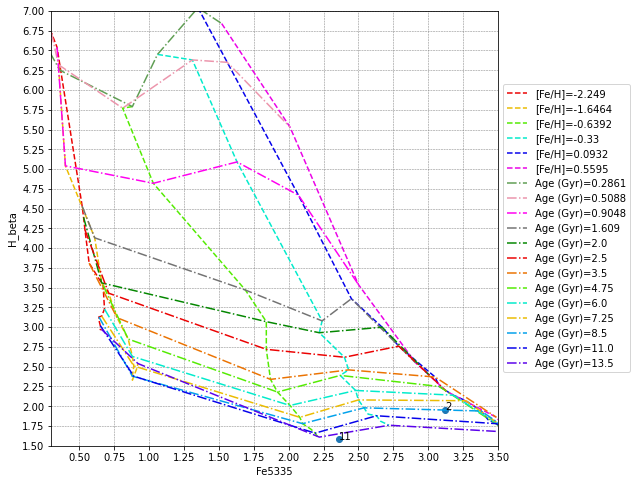

In [9]:
###########################################################
###################### SSPs ###############################
### Defining a list containing the ages that will be plotted.
#groups2_ssps_list_limited = [i for i in groups2_ssps_list if (i>=160900000.0) & (i < 119750000000.0)]

groups2_ssps_list_limited = [286100000.0, 508800000.0, 904800000.0, 1609000000.0, 2000000000.0, 
                        2500000000.0, 3500000000.0, 4750000000.0, 6000000000.0, 7250000000.0, 8500000000.0,
                        11000000000.0, 13500000000.0]

### Defining an age limit for plotting, based on the previous list.
age_lim_min = min(groups2_ssps_list_limited)
age_lim_max = max(groups2_ssps_list_limited)

### Making the plot.
fig = plt.figure(figsize=(8, 8))   #Defining figure. 
ax = plt.subplot()                 #Defining ax.

### Plotting the lines of constant metallicity.
j=0
for i in groups_ssps_list:
    grouping = groups_ssps.get_group(i)[(groups_ssps.get_group(i)['Age']>=age_lim_min) & (groups_ssps.get_group(i)['Age']<=age_lim_max)]
    x = grouping['Fe5335']
    y = grouping['H_beta']
    ax.plot(x, y, color=colors[j], linestyle='dashed', label='[Fe/H]='+str(i))
    j+=1

### Plotting the lines of constant age.
j=0
for i in groups2_ssps_list_limited:
    grouping2 = groups2_ssps.get_group(i)
    x = grouping2['Fe5335']
    y = grouping2['H_beta']
    ax.plot(x, y, color=colors2[j], linestyle='dashdot', label='Age (Gyr)='+str(i/(1e9)))
    j+=1

### Put a legend to the right of the current axis
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

### Setting the axis limits.
ax.set_xlim(left=0.3, right=3.5)
ax.set_ylim(bottom=1.5, top=7)

### Setting the axis labels.
ax.set_xlabel('Fe5335')
ax.set_ylabel('H_beta')

### Putting a grid in the graph.
ax.grid(color = 'gray', linestyle = '--', linewidth = 0.5)

ax.xaxis.set_major_locator(plt.MultipleLocator(0.25)) #Adding more lines to the grid.
ax.xaxis.set_minor_locator(plt.MultipleLocator(0.5))

ax.yaxis.set_major_locator(plt.MultipleLocator(0.25)) #Adding more lines to the grid.
ax.yaxis.set_minor_locator(plt.MultipleLocator(0.5))

###########################################################
###################### Gal ###############################
### Plotting the GALAXIES over the grid.
x_galpoints = df_gal['Fe5335']
y_galpoints = df_gal['H_beta']

ax.scatter(x_galpoints, y_galpoints)

#Annotating the points numbers.
n = df_gal.index.to_list()

for i, txt in enumerate(n):
    ax.annotate(txt, (x_galpoints[i], y_galpoints[i]))


plt.show()

### Index-index diagram - Mgb and  <𝐹𝑒>

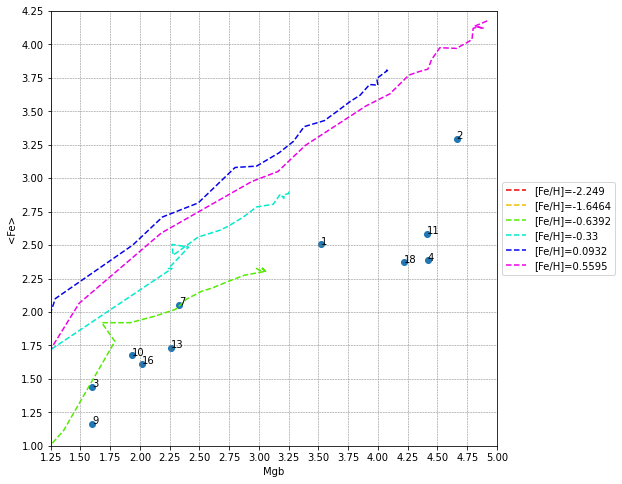

In [10]:
###########################################################
###################### SSPs ###############################
### Defining a list containing the ages that will be plotted.
groups2_ssps_list_limited = groups2_ssps_list

#groups2_ssps_list_limited = [286100000.0, 508800000.0, 904800000.0, 1609000000.0, 2000000000.0, 
#                        2500000000.0, 3500000000.0, 4750000000.0, 6000000000.0, 7250000000.0, 8500000000.0,
#                        11000000000.0, 13500000000.0]

### Defining an age limit for plotting, based on the previous list.
age_lim_min = min(groups2_ssps_list_limited)
age_lim_max = max(groups2_ssps_list_limited)

### Making the plot.
fig = plt.figure(figsize=(8, 8))   #Defining figure. 
ax = plt.subplot()                 #Defining ax.

### Plotting the lines of constant metallicity.
j=0
for i in groups_ssps_list:
    grouping = groups_ssps.get_group(i)[(groups_ssps.get_group(i)['Age']>=age_lim_min) & (groups_ssps.get_group(i)['Age']<=age_lim_max)]
    x = grouping['Mgb']
    y = grouping['<Fe>']
    ax.plot(x, y, color=colors[j], linestyle='dashed', label='[Fe/H]='+str(i))
    j+=1

### Plotting the lines of constant age.
#j=0
#for i in groups2_ssps_list_limited:
#    grouping2 = groups2_ssps.get_group(i)
#    x = grouping2['Fe5335']
#    y = grouping2['H_beta']
#    ax.plot(x, y, color=colors2[j], linestyle='dashdot', label='Age (Gyr)='+str(i/(1e9)))
#    j+=1

### Put a legend to the right of the current axis
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

### Setting the axis limits.
ax.set_xlim(left=1.25, right=5)
ax.set_ylim(bottom=1, top=4.25)

### Setting the axis labels.
ax.set_xlabel('Mgb')
ax.set_ylabel('<Fe>')

### Putting a grid in the graph.
ax.grid(color = 'gray', linestyle = '--', linewidth = 0.5)

ax.xaxis.set_major_locator(plt.MultipleLocator(0.25)) #Adding more lines to the grid.
ax.xaxis.set_minor_locator(plt.MultipleLocator(0.5))

ax.yaxis.set_major_locator(plt.MultipleLocator(0.25)) #Adding more lines to the grid.
ax.yaxis.set_minor_locator(plt.MultipleLocator(0.5))

###########################################################
###################### Gal ###############################
### Plotting the GALAXIES over the grid.
x_galpoints = df_gal['Mgb']
y_galpoints = df_gal['<Fe>']

ax.scatter(x_galpoints, y_galpoints)

#Annotating the points numbers.
n = df_gal.index.to_list()

for i, txt in enumerate(n):
    ax.annotate(txt, (x_galpoints[i], y_galpoints[i]))


plt.show()

### Index-Age Graph - $<Fe>$

In [11]:
index = '<Fe>'

Galaxies 0 to 5.

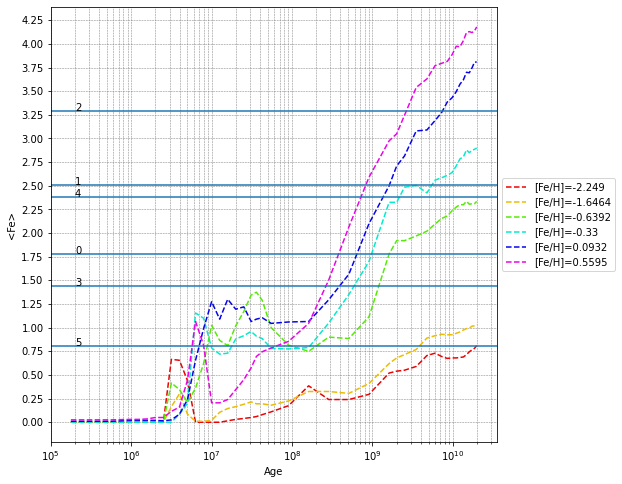

In [12]:
### Defining a list containing the ages that will be plotted.
#groups2_ssps_list_limited = [i for i in groups2_list if (i>=160900000.0) & (i < 119750000000.0)]

groups2_ssps_list_limited = groups2_ssps_list #All ages.

### Defining an age limit for plotting.
age_lim_min = min(groups2_ssps_list_limited)
age_lim_max = max(groups2_ssps_list_limited)

### Making the plot.
fig = plt.figure(figsize=(8, 8))   #Defining figure. 
ax = plt.subplot()                 #Defining ax.

### Plotting the age vs index.
j=0
for i in groups_ssps_list:
    grouping = groups_ssps.get_group(i)[(groups_ssps.get_group(i)['Age']>=age_lim_min) & (groups_ssps.get_group(i)['Age']<=age_lim_max)]
    x = grouping['Age']
    y = grouping[index]
    ax.plot(x, y, color=colors[j], linestyle='dashed', label='[Fe/H]='+str(i))
    j+=1

### Put a legend to the right of the current axis
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

### Setting the axis limits.
#ax.set_xlim(left=0.3, right=3.5)
#ax.set_ylim(bottom=1.5, top=7)

### Setting the axis labels.
ax.set_xlabel('Age')
ax.set_ylabel(index)

### Setting the axis scale.
ax.set_xscale('log')

### Putting a grid in the graph.
ax.grid(color = 'gray', linestyle = '--', linewidth = 0.5, which="both")

#ax.xaxis.set_major_locator(plt.MultipleLocator(0.25))
#ax.xaxis.set_minor_locator(plt.MultipleLocator(0.5))

ax.yaxis.set_major_locator(plt.MultipleLocator(0.25))  #Adding more lines to the grid.
ax.yaxis.set_minor_locator(plt.MultipleLocator(0.5))   

###########################################################
###################### Gal ###############################
### Plotting the GALAXIES over the grid.
gal_lim_down = 0
gal_lim_up = 5

for i in range(0, len(df_gal[index])):
    if (i>=gal_lim_down) & (i<=gal_lim_up):
        y_galpoints = df_gal[index][i]
        ax.axhline(y=y_galpoints)

#Annotating the points numbers.
n = df_gal.index.to_list()

for i, txt in enumerate(n):
    if (i>=gal_lim_down) & (i<=gal_lim_up):
        ax.annotate(txt, (2e5, df_gal[index][i]))

plt.show()

Galaxies 6 to 11.

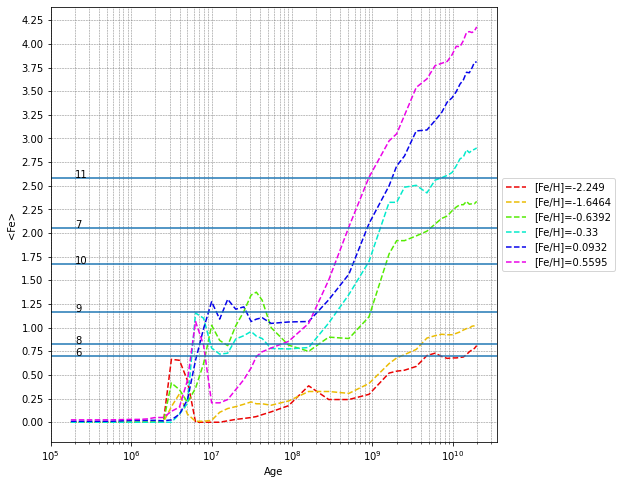

In [13]:
### Defining a list containing the ages that will be plotted.
#groups2_ssps_list_limited = [i for i in groups2_list if (i>=160900000.0) & (i < 119750000000.0)]

groups2_ssps_list_limited = groups2_ssps_list #All ages.

### Defining an age limit for plotting.
age_lim_min = min(groups2_ssps_list_limited)
age_lim_max = max(groups2_ssps_list_limited)

### Making the plot.
fig = plt.figure(figsize=(8, 8))   #Defining figure. 
ax = plt.subplot()                 #Defining ax.

### Plotting the age vs index.
j=0
for i in groups_ssps_list:
    grouping = groups_ssps.get_group(i)[(groups_ssps.get_group(i)['Age']>=age_lim_min) & (groups_ssps.get_group(i)['Age']<=age_lim_max)]
    x = grouping['Age']
    y = grouping[index]
    ax.plot(x, y, color=colors[j], linestyle='dashed', label='[Fe/H]='+str(i))
    j+=1

### Put a legend to the right of the current axis
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

### Setting the axis limits.
#ax.set_xlim(left=0.3, right=3.5)
#ax.set_ylim(bottom=1.5, top=7)

### Setting the axis labels.
ax.set_xlabel('Age')
ax.set_ylabel(index)

### Setting the axis scale.
ax.set_xscale('log')

### Putting a grid in the graph.
ax.grid(color = 'gray', linestyle = '--', linewidth = 0.5, which="both")

#ax.xaxis.set_major_locator(plt.MultipleLocator(0.25))
#ax.xaxis.set_minor_locator(plt.MultipleLocator(0.5))

ax.yaxis.set_major_locator(plt.MultipleLocator(0.25))  #Adding more lines to the grid.
ax.yaxis.set_minor_locator(plt.MultipleLocator(0.5))   

###########################################################
###################### Gal ###############################
### Plotting the GALAXIES over the grid.
gal_lim_down = 6
gal_lim_up = 11

for i in range(0, len(df_gal[index])):
    if (i>=gal_lim_down) & (i<=gal_lim_up):
        y_galpoints = df_gal[index][i]
        ax.axhline(y=y_galpoints)

#Annotating the points numbers.
n = df_gal.index.to_list()

for i, txt in enumerate(n):
    if (i>=gal_lim_down) & (i<=gal_lim_up):
        ax.annotate(txt, (2e5, df_gal[index][i]))

plt.show()

Galaxies 12 to 15.

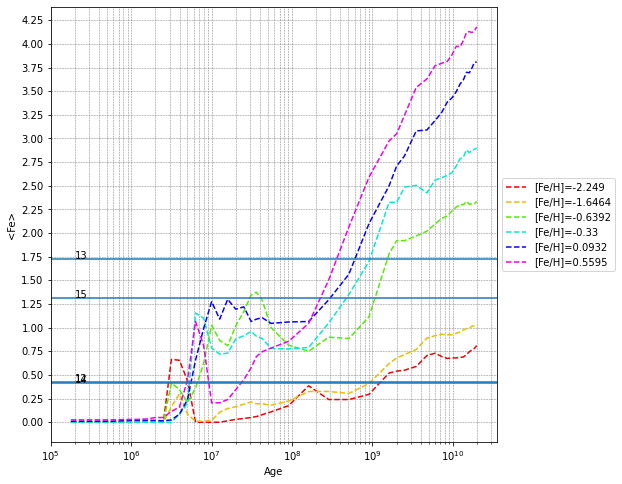

In [14]:
### Defining a list containing the ages that will be plotted.
#groups2_ssps_list_limited = [i for i in groups2_list if (i>=160900000.0) & (i < 119750000000.0)]

groups2_ssps_list_limited = groups2_ssps_list #All ages.

### Defining an age limit for plotting.
age_lim_min = min(groups2_ssps_list_limited)
age_lim_max = max(groups2_ssps_list_limited)

### Making the plot.
fig = plt.figure(figsize=(8, 8))   #Defining figure. 
ax = plt.subplot()                 #Defining ax.

### Plotting the age vs index.
j=0
for i in groups_ssps_list:
    grouping = groups_ssps.get_group(i)[(groups_ssps.get_group(i)['Age']>=age_lim_min) & (groups_ssps.get_group(i)['Age']<=age_lim_max)]
    x = grouping['Age']
    y = grouping[index]
    ax.plot(x, y, color=colors[j], linestyle='dashed', label='[Fe/H]='+str(i))
    j+=1

### Put a legend to the right of the current axis
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

### Setting the axis limits.
#ax.set_xlim(left=0.3, right=3.5)
#ax.set_ylim(bottom=1.5, top=7)

### Setting the axis labels.
ax.set_xlabel('Age')
ax.set_ylabel(index)

### Setting the axis scale.
ax.set_xscale('log')

### Putting a grid in the graph.
ax.grid(color = 'gray', linestyle = '--', linewidth = 0.5, which="both")

#ax.xaxis.set_major_locator(plt.MultipleLocator(0.25))
#ax.xaxis.set_minor_locator(plt.MultipleLocator(0.5))

ax.yaxis.set_major_locator(plt.MultipleLocator(0.25))  #Adding more lines to the grid.
ax.yaxis.set_minor_locator(plt.MultipleLocator(0.5))   

###########################################################
###################### Gal ###############################
### Plotting the GALAXIES over the grid.
gal_lim_down = 12
gal_lim_up = 15

j=0
for i in range(0, len(df_gal[index])):
    if (i>=gal_lim_down) & (i<=gal_lim_up):
        y_galpoints = df_gal[index][i]
        ax.axhline(y=y_galpoints)
        j+=1
        
#Annotating the points numbers.
n = df_gal.index.to_list()

for i, txt in enumerate(n):
    if (i>=gal_lim_down) & (i<=gal_lim_up):
        ax.annotate(txt, (2e5, df_gal[index][i]))

plt.show()

Galaxies 16 to 18.

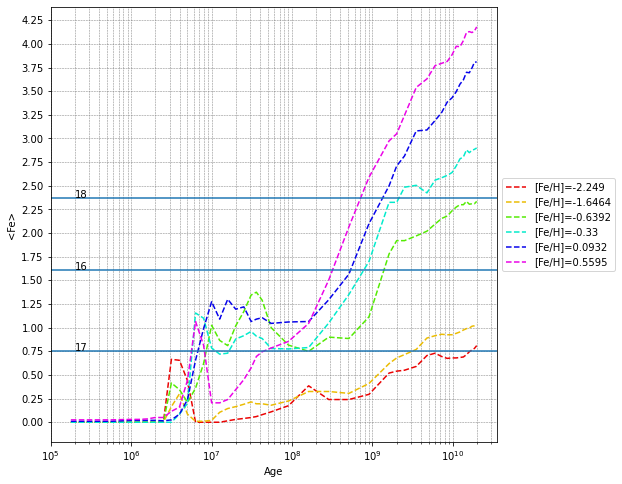

In [15]:
### Defining a list containing the ages that will be plotted.
#groups2_ssps_list_limited = [i for i in groups2_list if (i>=160900000.0) & (i < 119750000000.0)]

groups2_ssps_list_limited = groups2_ssps_list #All ages.

### Defining an age limit for plotting.
age_lim_min = min(groups2_ssps_list_limited)
age_lim_max = max(groups2_ssps_list_limited)

### Making the plot.
fig = plt.figure(figsize=(8, 8))   #Defining figure. 
ax = plt.subplot()                 #Defining ax.

### Plotting the age vs index.
j=0
for i in groups_ssps_list:
    grouping = groups_ssps.get_group(i)[(groups_ssps.get_group(i)['Age']>=age_lim_min) & (groups_ssps.get_group(i)['Age']<=age_lim_max)]
    x = grouping['Age']
    y = grouping[index]
    ax.plot(x, y, color=colors[j], linestyle='dashed', label='[Fe/H]='+str(i))
    j+=1

### Put a legend to the right of the current axis
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

### Setting the axis limits.
#ax.set_xlim(left=0.3, right=3.5)
#ax.set_ylim(bottom=1.5, top=7)

### Setting the axis labels.
ax.set_xlabel('Age')
ax.set_ylabel(index)

### Setting the axis scale.
ax.set_xscale('log')

### Putting a grid in the graph.
ax.grid(color = 'gray', linestyle = '--', linewidth = 0.5, which="both")

#ax.xaxis.set_major_locator(plt.MultipleLocator(0.25))
#ax.xaxis.set_minor_locator(plt.MultipleLocator(0.5))

ax.yaxis.set_major_locator(plt.MultipleLocator(0.25))  #Adding more lines to the grid.
ax.yaxis.set_minor_locator(plt.MultipleLocator(0.5))   

###########################################################
###################### Gal ###############################
### Plotting the GALAXIES over the grid.
gal_lim_down = 16
gal_lim_up = 18

j=0
for i in range(0, len(df_gal[index])):
    if (i>=gal_lim_down) & (i<=gal_lim_up):
        y_galpoints = df_gal[index][i]
        ax.axhline(y=y_galpoints)
        j+=1
        
#Annotating the points numbers.
n = df_gal.index.to_list()

for i, txt in enumerate(n):
    if (i>=gal_lim_down) & (i<=gal_lim_up):
        ax.annotate(txt, (2e5, df_gal[index][i]))

plt.show()